In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime
plt.style.use("default")

In [2]:
df_1 = pd.read_csv('reviews.csv')
# Comprobamos el dataset
print("El dataset tiene {} filas y {} columnas.".format(*df_1.shape))

print("El dataset tiene {} filas duplicadas.".format(df_1.duplicated().sum()))

El dataset tiene 830895 filas y 6 columnas.
El dataset tiene 0 filas duplicadas.


Al no haber ninguna fila duplicada no hay que hacer nada en ese sentido

In [3]:
df_1.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...


Las primeras opiiones son del año 2010, cuando empezo AirBnB a operar en Madrid

Nos puede ser de utilidad, añadir a este dataset, más información como puede ser la longitud y la latitud o el ID del huésped y algunas más. Para ello tenemos que juntar dos dataset

### Huéspedes con más propiedades

Vamos a estudiar un poco más detenidamente a los 4 primeros, para ver que clase de negocio tienen montado en torno a AirBnB

### Limpieza de datos

In [4]:
df_1.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         387
dtype: int64

Lo que queremos estudiar son los comentarios por lo tanto, cualquier comentario que no esté, es una fila de la que no queremos nada, es por ello que vamos a eliminar los NaN directamente.

In [5]:
df_1.dropna(inplace = True)

In [6]:
df_1.shape

(830507, 6)

In [7]:
from langdetect import detect

In [8]:
df = pd.read_csv("df_nlp.csv")

In [9]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_rating,language
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...,Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...,Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...,Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en


In [10]:
df.language.value_counts(normalize = True).head(10)

en       0.476182
es       0.368151
fr       0.058740
pt       0.022327
it       0.020685
de       0.013345
ko       0.008705
zh-cn    0.006828
ru       0.005103
nl       0.004573
Name: language, dtype: float64

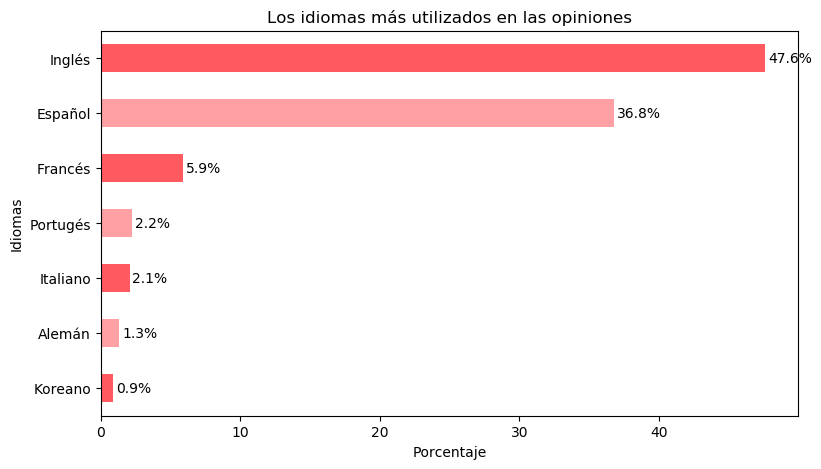

In [11]:
fig, ax = plt.subplots(figsize = (9,5))

(df.language.value_counts(normalize = True).head(7).sort_values()*100).plot(kind = "barh", color = ["#FF5A5F", "#ffa1a4"])

plt.ylabel("Idiomas")
plt.yticks(np.arange(7), ("Koreano", "Alemán", "Italiano", "Portugés", "Francés", "Español", "Inglés"))
plt.title("Los idiomas más utilizados en las opiniones")
plt.xlabel("Porcentaje")
for i in ax.patches:
    ax.text(x=i.get_width() + 0.2, y=i.get_y()+.175, 
            s=str(np.round(i.get_width(),1))+'%', 
            fontsize=10, color='black')

#plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/topidiomas.png")

DIVIDIMOS EN FUNCION DEL IDIOMA, NOS QUEDAMOS CON LOS MÁS UTILIZADOS.

In [12]:
df_en = df[(df['language']=='en')]
df_es  = df[(df['language']=='es')]
df_fr  = df[(df['language']=='fr')]

### Nubes de palabras (WordClouds)

In [13]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image

import re
import string

In [14]:
def plot_wordcloud(wordcloud, idioma):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title("Nube de palabras en " + idioma)

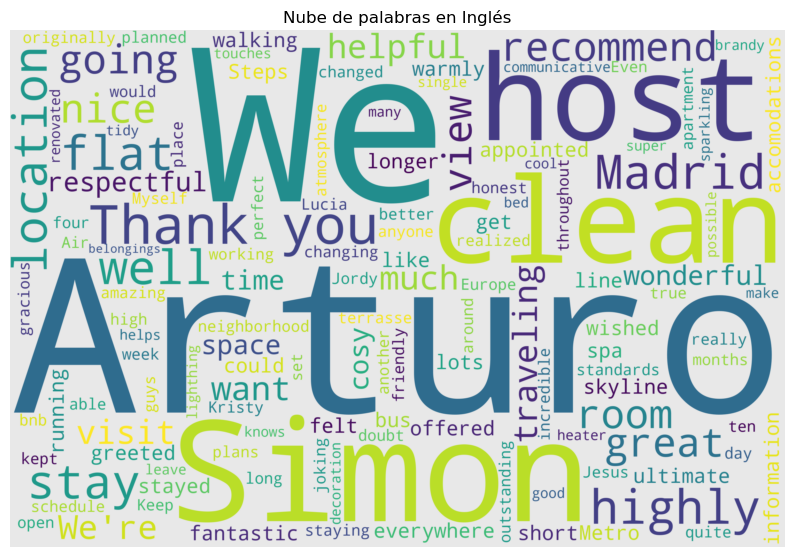

In [15]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="#e8e8e8", stopwords=stopwords.words("english"),
                      width=3000, height=2000).generate(str(df_en["comments"].values))

plot_wordcloud(wordcloud, "Inglés")
#plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/englishwordcloud.png")

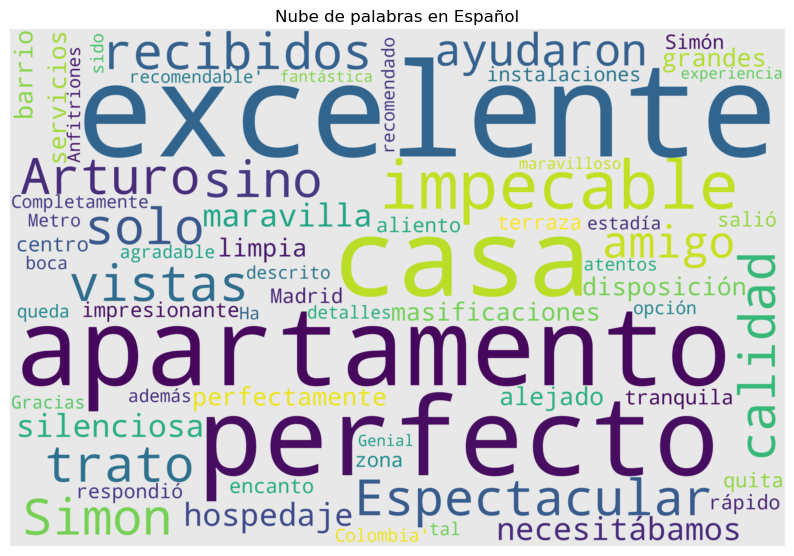

In [16]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="#e8e8e8", stopwords=stopwords.words("spanish"),
                      width=3000, height=2000).generate(str(df_es["comments"].values))

plot_wordcloud(wordcloud, "Español")
#plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/spanishwordcloud.png")

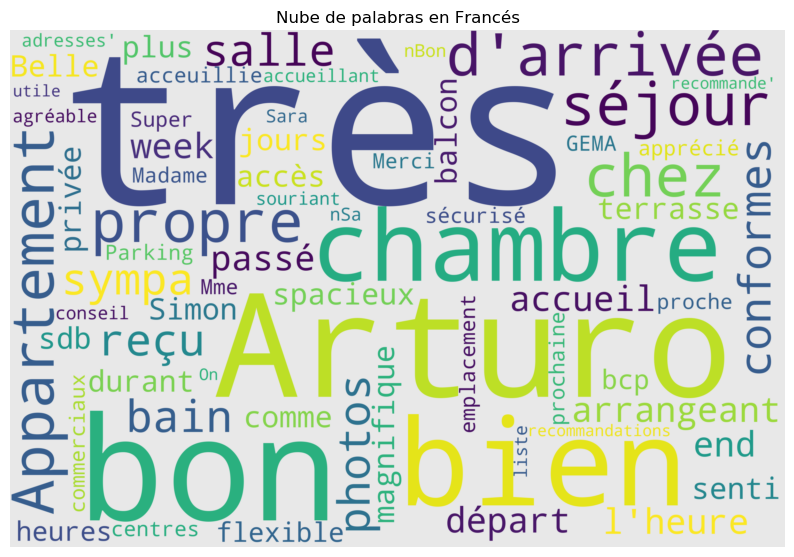

In [17]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="#e8e8e8", stopwords=stopwords.words("french"),
                      width=3000, height=2000).generate(str(df_fr["comments"].values))

plot_wordcloud(wordcloud, "Francés")
#plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/frenchwordcloud.png")

## Análisis de Sentimientos

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [25]:
def puntuacion_sentimientos(frase):
    snt = analyzer.polarity_scores(frase)
    print("{:-<40} {}".format(frase, str(snt)))

In [30]:
puntuacion_sentimientos("VADER is very smart, handsome, and funny.")
puntuacion_sentimientos("VADER is very smart, handsome, and funny. :)")
puntuacion_sentimientos("VADER is VERY SMART, handsome, and FUNNY!!!")

VADER is very smart, handsome, and funny. {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is very smart, handsome, and funny. :) {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.9076}
VADER is VERY SMART, handsome, and FUNNY!!! {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}


In [ ]:
# Puntuación negativa
def puntuacion_negativa(text):
    valor_negativo = analyzer.polarity_scores(text)['neg']
    return valor_negativo

# Puntuación neutral
def puntuacion_neutral(text):
    valor_neutral = analyzer.polarity_scores(text)['neu']
    return valor_neutral

# Puntuación positiva
def puntuacion_positiva(text):
    valor_positivo = analyzer.polarity_scores(text)['pos']
    return valor_positivo

# Puntuación compuesta
def puntuacion_compuesta(text):
    valor_compuesto = analyzer.polarity_scores(text)['compound']
    return valor_compuesto


In [ ]:
puntuacion_positiva("The food is really GOOD! But the service is dreadful :(")

In [ ]:
df_en['sentiment_neg'] = df_en['comments'].apply(puntuacion_negativa)
df_en['sentiment_neu'] = df_en['comments'].apply(puntuacion_neutral)
df_en['sentiment_pos'] = df_en['comments'].apply(puntuacion_positiva)
df_en['sentiment_compound'] = df_en['comments'].apply(puntuacion_compuesta)

In [ ]:
# Guardo el dataframe para que no tarde otra vez
df_en.to_csv('sentimiento_df_en.csv', index=False)


In [392]:
df = pd.read_csv('sentimiento_df_en.csv')
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_rating,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in Madrid! Steps from the Metro and bus line to eve...,Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en,0.000,0.779,0.221,0.9523
1,6369,31018,2010-03-23,84338,David,"Myself and Kristy originally planned on staying with Arturo for only a week, but when our plans ...",Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en,0.017,0.609,0.374,0.9978
2,6369,34694,2010-04-10,98655,Marion,"We had a great time at Arturo and Simon's ! A cosy apartment and a wonderful terrasse, and above...",Chamartín,13660,40.45724,-3.67688,74,Apartment,98.0,en,0.000,0.612,0.388,0.9322


### Grafico de la distribución de las puntuaciones

In [ ]:
# 4 Histogramas

fig, axes = plt.subplots(2, 2, figsize=(10,8))
color = [ "#ffa1a4", "#767676", "#00e6d4",'#FF5A5F',  '#00A699']
# plot all 4 histograms
df.hist('sentiment_neg', bins=30, ax=axes[0,0], color=color[4], alpha=1)
axes[0,0].set_title('Puntuación Sentimientos Negativos')
axes[0,0].grid(False)
df.hist('sentiment_neu', bins=30, ax=axes[0,1], color=color[1], alpha=0.6)
axes[0,1].set_title('Puntuación Sentimientos Neutral')
axes[0,1].grid(False)
df.hist('sentiment_pos', bins=30, ax=axes[1,0], color=color[2], alpha=0.6)
axes[1,0].set_title('Puntuación Sentimientos Positivos')
axes[1,0].grid(False)
df.hist('sentiment_compound', bins=30, ax=axes[1,1], color=color[3], alpha=0.6)
axes[1,1].set_title('Puntuación Compuesta')
axes[1,1].grid(False)

fig.text(0.5, 0.03, 'Puntuación Sentimientos', ha='center')
fig.text(0.03, 0.5, 'Número de reviews', va='center', rotation='vertical')


# plot title
plt.suptitle('Resultados del análisis de sentimientos');
plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/VADERANALYSIS.png");

In [393]:
rang_pos = 0.7
rang_neg = -0.05 

df_pos = df.loc[df.sentiment_compound >= rang_pos]
pos_comments = df_pos['comments'].tolist()

df_neu = df.loc[(df.sentiment_compound > rang_neg) & (df.sentiment_compound < rang_pos)]
neu_comments = df_neu['comments'].tolist()

df_neg = df.loc[(df.sentiment_compound < rang_neg) & (df.sentiment_compound != 0.0)]
neg_comments = df_neg['comments'].tolist()

df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)
df_neu['text_length'] = df_neu['comments'].apply(len)


Vemos como es la distribución final de los datos, pero en general parecen bastante buenos.

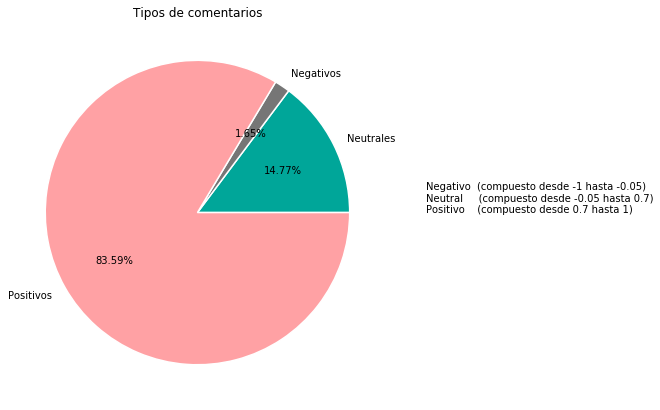

In [394]:
neg = len(df_neg); neu = len(df_neu); pos = len(df_pos)
names = ["Neutrales", 'Negativos','Positivos']
size = [neu, neg, pos]
color = [ "#ffa1a4", "#767676", "#00e6d4",'#FF5A5F',  '#00A699']


plt.pie(size, labels=names, colors=[color[4], color[1], color[0]], 
        autopct='%.2f%%', pctdistance=0.63,
        wedgeprops={'linewidth':1.5, 'edgecolor':'white' })



fig = plt.gcf()
fig.set_size_inches(7,7)
plt.text(1.5,0, "Negativo  (compuesto desde {} hasta {})".format(str(-1),str(rang_neg)) + 
         "\nNeutral     (compuesto desde {} hasta {})".format(str(rang_neg),str(rang_pos)) +
         "\nPositivo    (compuesto desde {} hasta {})".format(str(rang_pos),str(1)))
plt.title("Tipos de comentarios")
plt.show()

Se puede ver que, en general, los comentarios en su mayoría son positivos. Ahora sería muy interesante estudiar la longitud de los comentarios y pararnos a ver que hace que se obtenga un buen o un mal comentario.

### Longitud comentarios

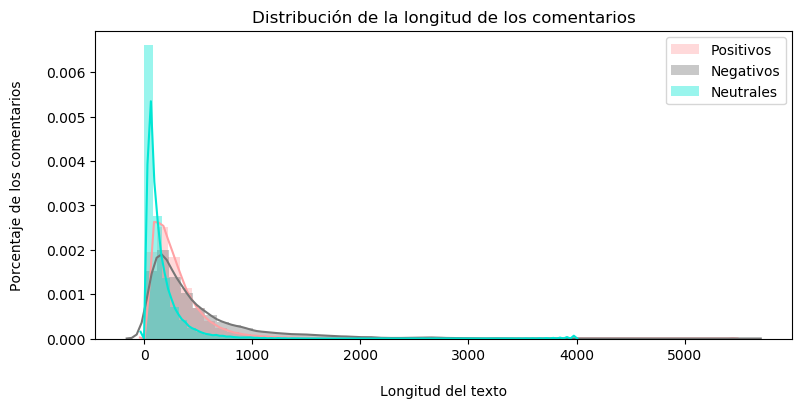

In [86]:
plt.figure(figsize=(9,4))
color = [ "#ffa1a4", "#767676", "#00e6d4",'#FF5A5F',  '#00A699']
sns.distplot(df_pos['text_length'], kde=True, bins=50, color=color[0])
sns.distplot(df_neg['text_length'], kde=True, bins=50, color=color[1])
sns.distplot(df_neu['text_length'], kde=True, bins=50, color=color[2])


plt.title('Distribución de la longitud de los comentarios')
plt.legend(['Positivos', 'Negativos', "Neutrales"], loc = "best")
plt.xlabel('\nLongitud del texto')
plt.ylabel('Porcentaje de los comentarios\n')

plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/longitudopiniones.png");

### Se muestran algunos comentarios aleatorios

In [90]:
# Algunos comentarios positivos
import random
num2 = random.randint(0, len(pos_comments)-4)

pos_comments[num2:num2+3]

['Location, location, location. This apartment is located in the center of Salamanca. This district is so elegant, fashioned and quiet. It’s suitable for those people who intend to avoid crowds and noise. There are so many wonderful restaurants nearby. The apartment is on the 5th floor with lift. But be ware of that you have to climb some stairs. It’s newly renovated and super clean. It’s just like the pictures except for those beautiful flowers. I love the living room which is spacious and tasteful. The sunny and lovely terrace is definitely a bonus. The only drawback is that the detergent is insufficient. \n\n公寓坐落在优雅､时尚而又安静的萨拉曼卡区的中心位置,无比优越的地点,特别适合热爱时尚喜欢买买买且不喜欢大批游客的人,周边的餐厅都非常好,随便去一家人比较多的餐厅都比好多攻略推荐的好｡公寓在5楼,有电梯,但仍然有一些楼梯需要爬｡房间应该是新装修不久,干净整洁有品味,除了那些花基本上和图片一致｡客厅很大很舒服,特别喜欢那个露台,天气好的时候在露台享用早餐真是一大美事,仅仅这个露台已经值回票价｡房东是一个专业团队,各方面很专业,就是回复稍微有点慢,而且为旅客准备的洗衣粉完全不够,只够用一次的｡(因为他们为新入住的客人准备了一个套装,包括洗碗布抹布洗衣粉什么的)',
 'Great place and wonderful location. Loved it and I hope to be back.',
 'The location of this fla

In [89]:
# Algunos comentarios neutrales
import random
num3 = random.randint(0, len(neu_comments)-4)

neu_comments[num3:num3+3]

['This was my first businesstrip to lovely Madrid (Website hidden by Airbnb) The charming corner apartment with 5! balconies is located in the most cool and hip area with many shops, cafes and restaurants. The Metro is close by, but almost everything is in walking distance.  Take a walk to see Guernica. What´s  not to like?',
 'The apt was lovely - just as described and very centrally located.',
 'Overall enjoyed our stay.']

In [38]:
# Algunos comentarios negativos
import random
num3 = random.randint(0, len(neg_comments)-4)

neg_comments[num3:num3+3]

['The host didn’t show up and could not be contacted, since the phone number provided was invalid. No response to messages via Airbnb app. Ended up staying in a nearby hotel.',
 'Horrible. The water supply was cut during the first night and we had to move somewhere else (airbnb still charged us for the first night). Apart from that the studiowas not properly clean: towel provides was dirty and kithen utensils not properly washed. The studio has no heating, they provide a small electric one that is not capable to warm up both room and bathroom.',
 'Not my most favorite place. The bed was really uncomfortable. The neighborhood is nice though.']

In [ ]:
order = list(df.groupby("neighbourhood_group").agg("median")["sentiment_compound"].sort_values().index)
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x='neighbourhood_group', y='sentiment_compound', order = order, palette = ["#f0f0f0"])
plt.xticks(rotation=25, ha = "right")
#xmin, xmax = plt.xlim()
#plt.hlines(madrid_bnb2.price.mean(), xmin, xmax)

plt.ylabel("Precio ($)")
plt.xlabel("Barrio")
plt.title("Precios en función del barrio")
plt.show()

In [ ]:
order = list(df.groupby("neighbourhood_group").agg("median")["review_scores_rating"].sort_values().index)
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x='neighbourhood_group', y='review_scores_rating', order = order, palette = ["#f0f0f0"])
plt.xticks(rotation=25, ha = "right")
#xmin, xmax = plt.xlim()
#plt.hlines(madrid_bnb2.price.mean(), xmin, xmax)

plt.ylabel("Precio ($)")
plt.xlabel("Barrio")
plt.title("Precios en función del barrio")
plt.show()

In [ ]:
plt.scatter(df.number_of_reviews, df.sentiment_compound)

## Positivos

#### Palabras y grupos de palabras más repetidas

In [16]:
def get_top_n_words(corpus, n=None, n_min = 1, n_max = 1, stop_words = None):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer(analyzer='word', ngram_range=(n_min, n_max), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

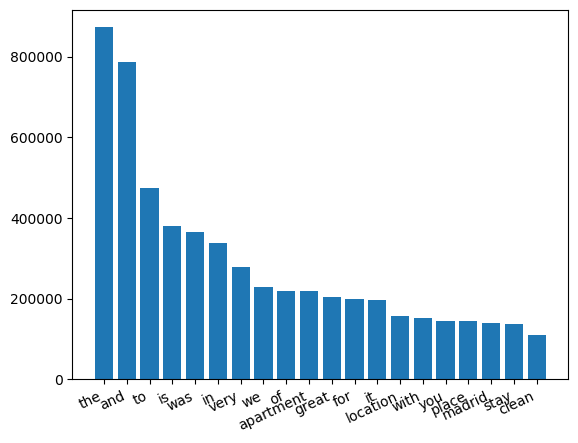

In [17]:
common_words = get_top_n_words(pos_comments, n=20, n_min=1, n_max=1, stop_words=None)

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

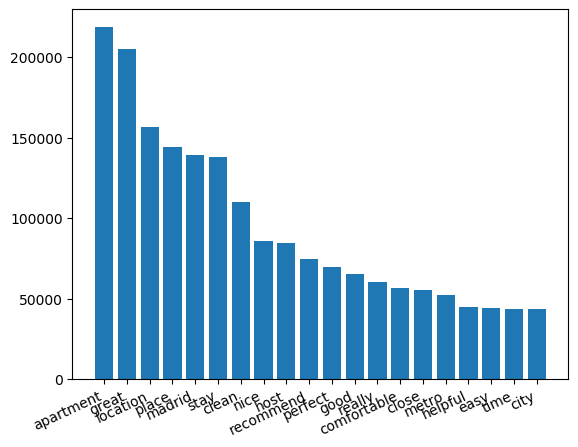

In [18]:
common_words = get_top_n_words(pos_comments, n=20, n_min=1, n_max=1, stop_words="english")

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

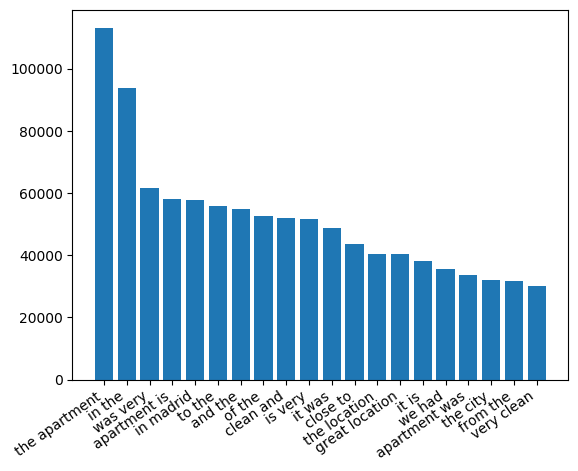

In [19]:
common_words = get_top_n_words(pos_comments, n=20, n_min=2, n_max=2, stop_words=None)

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

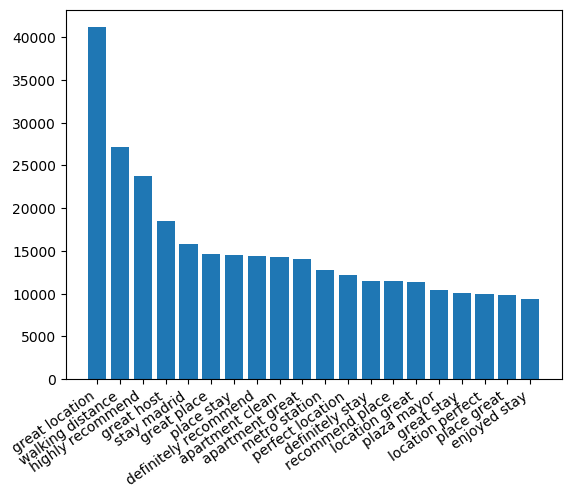

In [20]:
common_words = get_top_n_words(pos_comments, n=20, n_min=2, n_max=2, stop_words="english")

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

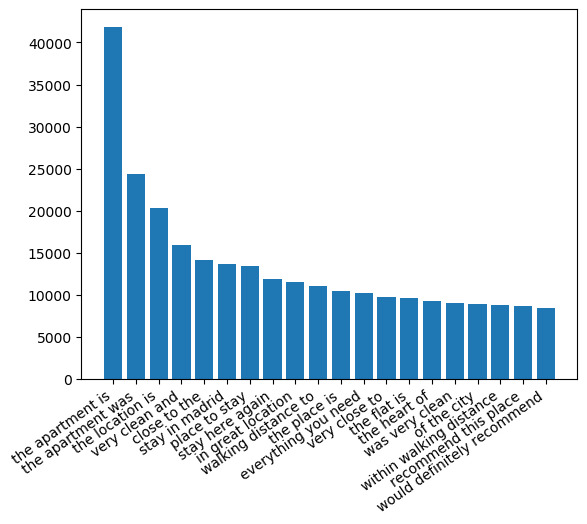

In [21]:
common_words = get_top_n_words(pos_comments, n=20, n_min=3, n_max=3, stop_words=None)

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

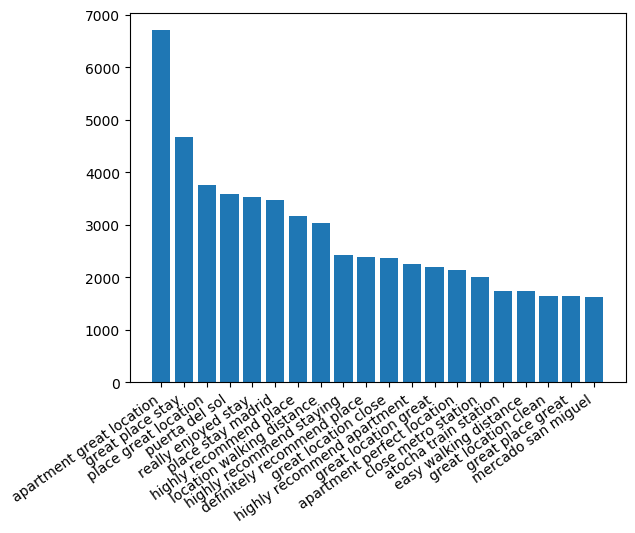

In [22]:
common_words = get_top_n_words(pos_comments, n=20, n_min=3, n_max=3, stop_words="english")

plt.bar(pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word").index, pd.DataFrame(common_words, columns = ["word", "count"]).set_index("word")["count"])
plt.xticks(rotation = 35, ha = "right")
plt.grid(False)

## Topic Modelling (Modelado de Temas)

#### Preparación del documento
Hay que tener los documentos como una lista, esto ya lo tenemos en `pos_comments`

#### Limpieza y Preprocesado
En este paso, eliminaremos las puntuaciones, las *stopwords* y normalizaremos el corpus. En este caso vamos a *lemmatize* que consisten devolver a las palabras a su forma base, e.g. sharing-->share o families-->family

In [340]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'get', 'do', 'done', 'try', 'many', 'some', 'thank', 'see', 'rather', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'also', 'may', 'take', 'come'])

In [612]:
def clean(docs):
    for doc in docs:
        doc = re.sub('\S*@\S*\s?', '', doc)
        doc = re.sub('\s+', ' ', doc)
        doc = re.sub("\'", "", doc)
        doc = re.sub('[/(){}\[\]\|@,;]', '',doc)
        doc = re.sub('[^0-9a-z #+_]', '',doc)
        doc = re.sub(r'\W*\b\w{1,2}\b', '', doc)
        doc = gensim.utils.simple_preprocess(str(doc), deacc=True) 
        yield(doc)  

# Convertimos a lista
data_words = list(clean(pos_comments))

<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \[
<ipython-input-612-ddaec694782e>:3: DeprecationWarning: invalid escape sequence \S
  doc = re.sub('\S*@\S*\s?', '', doc)
<ipython-input-612-ddaec694782e>:4: DeprecationWarning: invalid escape sequence \s
  doc = re.sub('\s+', ' ', doc)
<ipython-input-612-ddaec694782e>:6: DeprecationWarning: invalid escape sequence \[
  doc = re.sub('[/(){}\[\]\|@,;]', '',doc)


In [613]:
# Construimos biagramas y triagrams
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # Quitamos los StopWords una vez más después de la la Lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [614]:
data_ready_pos = data_ready

#### Preparación Matriz Documento-Palabra
Para ejecutar cualquier modelo matemático en un corpus de texto, es una buena práctica convertirlo en una matriz de representación. Python proporciona muchas librerías excelentes para esto, `gensim` es una de estas librerías excelentes para manejar datos de texto. Es escalable, robusta y eficiente.

Para cada documento creamos un diccionario que informa de cuántas palabras y cuántas veces aparecen esas palabras. Guarda esto en `corpus`, y luego revisa nuestro documento seleccionado antes.

#### Ejecución modelo LDA

Se crea el objeto que forma el modelo LDA y se entrena en la matriz Documento-Palabra. Este entrenamiento, necesita algunos parámetros como entrada.

In [510]:
# Se crea Dictionary
id2word = corpora.Dictionary(data_ready)

# Se crea Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [345]:
# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=20,
                                           passes=15,
                                           alpha='symmetric',
                                           iterations=200,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.069*"place" + 0.063*"stay" + 0.054*"location" + 0.051*"great" + '
  '0.046*"apartment" + 0.041*"host" + 0.036*"clean" + 0.026*"adrid" + '
  '0.025*"nice" + 0.022*"recommend"'),
 (1,
  '0.029*"apartment" + 0.023*"walk" + 0.022*"super" + 0.020*"city" + '
  '0.020*"minute" + 0.020*"feel" + 0.019*"area" + 0.015*"home" + 0.015*"night" '
  '+ 0.014*"lovely"'),
 (2,
  '0.019*"always" + 0.017*"time" + 0.017*"bed" + 0.017*"small" + 0.016*"bit" + '
  '0.016*"shower" + 0.014*"water" + 0.013*"thing" + 0.013*"bedroom" + '
  '0.013*"respond"'),
 (3,
  '0.063*"flat" + 0.057*"recommend" + 0.038*"walk" + 0.037*"highly" + '
  '0.031*"quick" + 0.028*"ighly" + 0.026*"distance" + 0.024*"short" + '
  '0.023*"verythe" + 0.020*"attraction"'),
 (4,
  '0.084*"room" + 0.036*"good" + 0.034*"nice" + 0.031*"back" + 0.024*"center" '
  '+ 0.023*"clean" + 0.020*"bed" + 0.020*"well" + 0.020*"ice" + 0.019*"big"')]


In [350]:
# uncomment the code if working locally
lda_model.save('model_pos.gensim')

In [506]:
lda = gensim.models.ldamodel.LdaModel.load("model_pos.gensim")

## Resultados
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

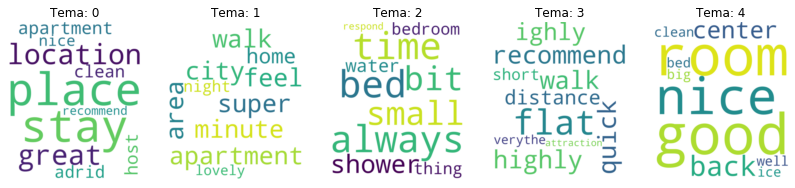

In [494]:
fig, axes = plt.subplots(1,5,figsize = (14,5))
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    else :
        wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white",
                          width=1700, height=2000).generate(str(", ".join([word for word in dict(lda_model.show_topic(i)).keys()])))
        ax.imshow(wordcloud, interpolation = 'bilinear')
        ax.axis("off")
        ax.set_title("Tema: " + str(i))

plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/wordcloud_pos.png");

#### Tema más común en cada opinión

In [511]:
def dominant_topic(ldamodel=None, corpus=corpus, texts=data):
    
    dom_topics_df = pd.DataFrame()

    # Obtenemos el tema principal
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, weight_topic) in enumerate(row):
            if j == 0:  # => Tema dominante
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                dom_topics_df = dom_topics_df.append(pd.Series([int(topic_num), round(weight_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    dom_topics_df.columns = ['tema_dominante', 'peso_tema', 'keywords']

    # Se añade el texto original
    orig_text = pd.Series(texts)
    dom_topics_df["text"]= orig_text
    return(dom_topics_df)

In [512]:
df_dominant_topic = dominant_topic(ldamodel=lda_model, corpus=corpus, texts=pos_comments)
df_dominant_topic.head(2)

,tema_dominante,peso_tema,keywords,text
0,3.0,0.4602,"flat, recommend, walk, highly, quick, ighly, distance, short, verythe, attraction",Simon and Arturo have the ultimate location in Madrid! Steps from the Metro and bus line to eve...
1,0.0,0.4471,"place, stay, location, great, apartment, host, clean, adrid, nice, recommend","Myself and Kristy originally planned on staying with Arturo for only a week, but when our plans ..."


#### Frase más significativa de cada tema
Creamos un código que seleccione la opinión con más peso de cada uno de los temas, estableciendo esta como la más representativa del tema

In [513]:
key_phrase = []
for i, grp in df_dominant_topic.groupby("tema_dominante"):
    key_phrase.append(grp.peso_tema.idxmax())
key_phrase = df_dominant_topic.loc[key_phrase,:].reset_index(drop=True)
key_phrase

,tema_dominante,peso_tema,keywords,text
0,0.0,0.9598,"place, stay, location, great, apartment, host, clean, adrid, nice, recommend",We had a good time staying at Dan's place. The place was clean and chic. The location is closed ...
1,1.0,0.9110,"apartment, walk, super, city, minute, feel, area, home, night, lovely",made us feel right at home right away. super easy - no stress.
2,2.0,0.9115,"always, time, bed, small, bit, shower, water, thing, bedroom, respond",I'm very kind. We arrived after 2 a.m. because of the late arrival of our flight. They've been w...
3,3.0,0.9271,"flat, recommend, walk, highly, quick, ighly, distance, short, verythe, attraction","Beautiful flat in the heart of Madrid walking distance from the main attractions, highly recomme..."
4,4.0,0.8994,"room, good, nice, back, center, clean, bed, well, ice, big","Nice apartament, well located and really nice people"


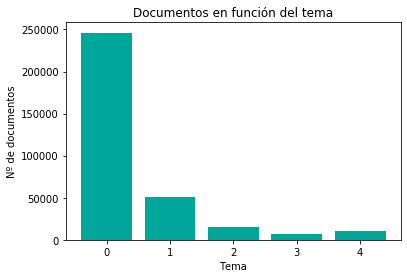

In [518]:
plt.bar(df_dominant_topic.groupby("tema_dominante").size().index, df_dominant_topic.groupby("tema_dominante").size().values,
       color = '#00A699')
plt.ylabel("Nº de documentos")
plt.title("Documentos en función del tema")
plt.xlabel("Tema")


#### Longitud de los comentarios en función del tema

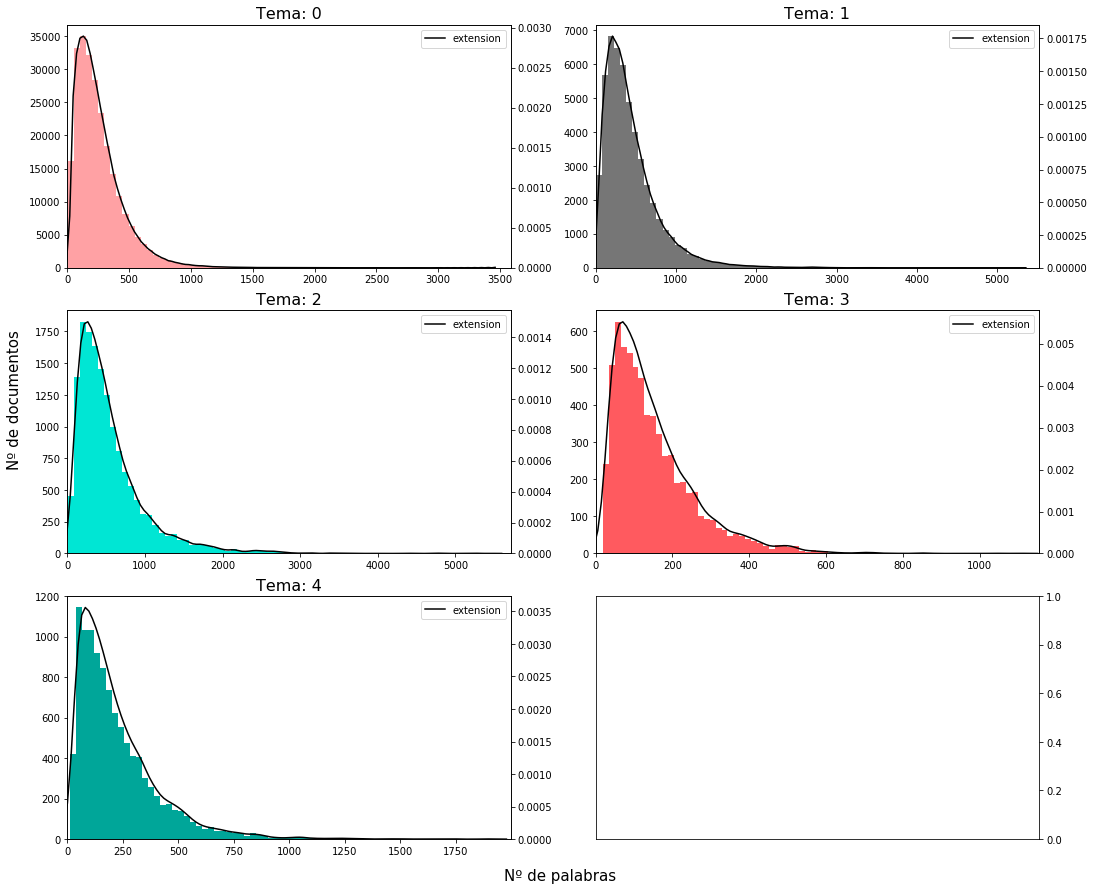

In [525]:
df_dominant_topic["extension"] = df_dominant_topic.text.apply(len)
fig, axes = plt.subplots(3,2, figsize = (15,13))
color = ["#ffa1a4", "#767676", "#00e6d4",'#FF5A5F', '#00A699', '#00A699']

for i, ax in enumerate(axes.flatten()) :
    df = df_dominant_topic[df_dominant_topic.tema_dominante == i]["extension"]
    ax.hist(df, bins = 70, color = color[i])
    ax.grid(False)
    xmin, xmax = ax.set_xlim()
    ax.set_xlim(0,xmax)
    ax.tick_params(axis='y')
    sns.kdeplot(df, color="black", ax=ax.twinx())
    ax.set_title('Tema: '+ str(i), fontdict=dict(size=16))

fig.delaxes(axes[2,1])
fig.tight_layout()
fig.text(-0.01,0.5, "Nº de documentos", rotation=90, va='center', size =15)
fig.text(0.45,-0.01, "Nº de palabras",  va='center', size =15)
fig.subplots_adjust(top=0.90)


plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/extension_pos.png");

#### Clusters

In [444]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.044184  0.149888       1        1  28.873411
2     -0.364257  0.162746       2        1  24.725979
0      0.016617 -0.196643       3        1  22.004097
4      0.005725 -0.309789       4        1  12.224472
3      0.297731  0.193799       5        1  12.172041, topic_info=         Term         Freq        Total Category  logprob  loglift
48      place  3182.000000  3182.000000  Default  30.0000  30.0000
51       room  2155.000000  2155.000000  Default  29.0000  29.0000
19       stay  2912.000000  2912.000000  Default  28.0000  28.0000
12   location  2484.000000  2484.000000  Default  27.0000  27.0000
35      great  2343.000000  2343.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
22       walk   969.675842  2348.370361   Topic5  -3.2735   1.2215
484    locate   443.217529  1099.683472   Topic5  -4.0564   1.1973
203      kind   319.286926   762.317261   Topic5  -4.3843   1.2358
723   central   282.359528   636.314209   Topic5  -4.5072   1.2935
465      trip   254.347672   531.409851   Topic5  -4.6117   1.3692

[229 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
269       2  0.998731  absolutely
67        1  1.000489      access
77        3  0.848744       adrid
77        5  0.151233       adrid
68        1  1.000885     airport
...     ...       ...         ...
24        4  0.315255        well
24        5  0.148320        well
795       2  1.000332      window
66        3  0.998262   wonderful
60        1  1.000059        work

[224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

## Negativos

In [546]:
data_words = list(clean(neg_comments))
data_ready = process_words(data_words)

In [585]:
# Se crea Dictionary
id2word = corpora.Dictionary(data_ready)

# Se crea Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# LDA model
lda_model_neg = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           passes=500,
                    
                                           per_word_topics=True)

pprint(lda_model_neg.print_topics())

[(0,
  '0.024*"host" + 0.020*"apartment" + 0.014*"stay" + 0.012*"time" + '
  '0.011*"day" + 0.010*"check" + 0.010*"leave" + 0.009*"tell" + 0.009*"place" '
  '+ 0.009*"arrive"'),
 (1,
  '0.032*"room" + 0.023*"apartment" + 0.019*"small" + 0.019*"bed" + '
  '0.018*"flat" + 0.015*"good" + 0.015*"location" + 0.013*"really" + '
  '0.013*"clean" + 0.011*"bathroom"'),
 (2,
  '0.038*"water" + 0.034*"shower" + 0.028*"hot" + 0.014*"place" + 0.014*"stay" '
  '+ 0.013*"bathroom" + 0.013*"apartment" + 0.013*"problem" + 0.012*"work" + '
  '0.012*"night"'),
 (3,
  '0.038*"apartment" + 0.022*"location" + 0.022*"place" + 0.016*"walk" + '
  '0.016*"night" + 0.014*"stay" + 0.013*"close" + 0.011*"noise" + 0.009*"area" '
  '+ 0.009*"restaurant"'),
 (4,
  '0.022*"bed" + 0.021*"place" + 0.020*"dirty" + 0.014*"apartment" + '
  '0.013*"floor" + 0.011*"sheet" + 0.010*"stain" + 0.010*"bathroom" + '
  '0.009*"hair" + 0.009*"towel"')]


In [586]:
# uncomment the code if working locally
lda_model_neg.save('model_neg.gensim')

## Resultados

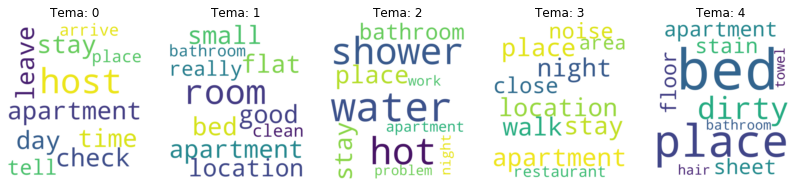

In [587]:
fig, axes = plt.subplots(1,5,figsize = (14,5))
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    else :
        wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white",
                          width=1700, height=2000).generate(str(", ".join([word for word in dict(lda_model_neg.show_topic(i)).keys()])))
        ax.imshow(wordcloud, interpolation = 'bilinear')
        ax.axis("off")
        ax.set_title("Tema: " + str(i))

plt.savefig("/home/ignareyesa/Escritorio/TFG/Latex/Images/wordcloud_neg.png");

In [588]:
df_dominant_topic = dominant_topic(ldamodel=lda_model_neg, corpus=corpus, texts=neg_comments)
df_dominant_topic.head(5)

,tema_dominante,peso_tema,keywords,text
0,0.0,0.5611,"host, apartment, stay, time, day, check, leave, tell, place, arrive",I stayed at Agustina's place for one out of the three evenings I originally booked. While her ap...
1,3.0,0.5152,"apartment, location, place, walk, night, stay, close, noise, area, restaurant",We have just returned from a weekend stay at the above apt. One of the main reasons we booked i...
2,0.0,0.7385,"host, apartment, stay, time, day, check, leave, tell, place, arrive",This is the absolute opposite of the spirit of Airbnb: 1) this is through an agency. 2) Nothin...
3,0.0,0.9410,"host, apartment, stay, time, day, check, leave, tell, place, arrive","I do not advise friends to rent a very rude apartment , agreed with me that I could leave 13:00 ..."
4,4.0,0.4994,"bed, place, dirty, apartment, floor, sheet, stain, bathroom, hair, towel",Unfortunately our experience with Vicenzo was very disappointing. The apartment is only meant f...


In [596]:
key_phrase = []
for i, grp in df_dominant_topic.groupby("tema_dominante"):
    key_phrase.append(grp.peso_tema.idxmax())
key_phrase = df_dominant_topic.loc[key_phrase,:].reset_index(drop=True)
key_phrase.text.to_list()

['AVOID staying here. The host is rude, uncooperative and unwelcoming.\n\nThis is the worst AIRBNB experience thus far, warning signs should have been triggered as there are similar negative reviews for this host and is in fact the first and only time I’ve needed to call Airbnb to try and resolve a problem, and it was that bad.\nI made a reservation for my parents, a 58 y/old mother and my father, 72 y/old. I arranged and agreed with the host when booking that they would arrive early in Madrid to drop their bags prior to check in; I thought all would be fine. However this was only the start of a multitude of failings.\nThey arrived early in Madrid and asked to drop off the bags at the timings agreed. The host started the day complaining that they woke up her up, since they used the doorbell. These timings were agreed with the host; however she started to act unreasonable from this point.\nThey come back later, at 12:00 midday the listed check in time to check in and rest. Fryka (the ho

Text(0.5, 0, 'Tema')

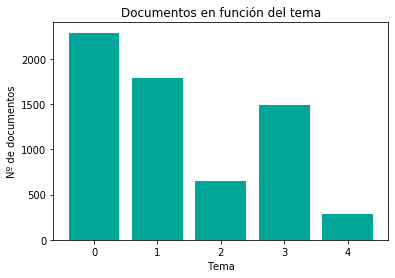

In [590]:
plt.bar(df_dominant_topic.groupby("tema_dominante").size().index, df_dominant_topic.groupby("tema_dominante").size().values,
       color = '#00A699')
plt.ylabel("Nº de documentos")
plt.title("Documentos en función del tema")
plt.xlabel("Tema")

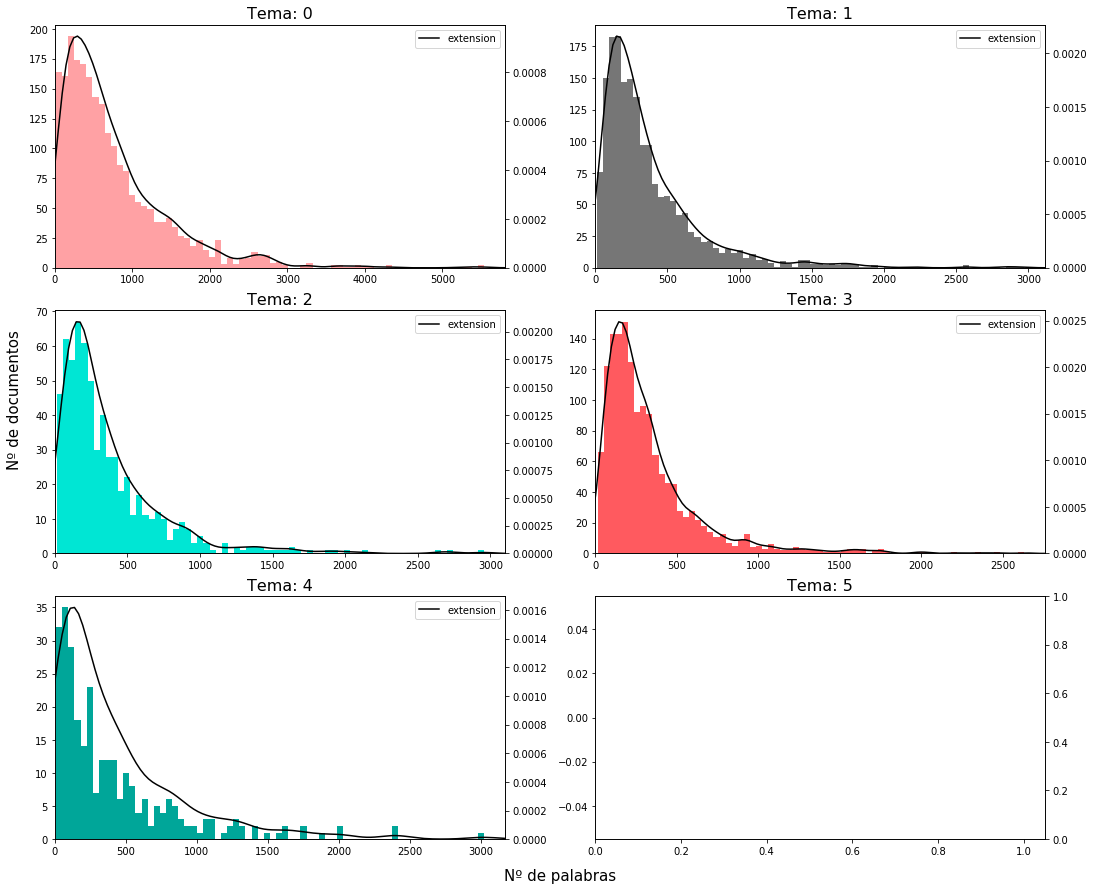

In [595]:
df_dominant_topic["extension"] = df_dominant_topic.text.apply(len)
fig, axes = plt.subplots(3,2, figsize = (15,13))
color = ["#ffa1a4", "#767676", "#00e6d4",'#FF5A5F', '#00A699', '#00A699']

for i, ax in enumerate(axes.flatten()) :
    df = df_dominant_topic[df_dominant_topic.tema_dominante == i]["extension"]
    df.hist(bins = 70, ax = ax, color = color[i])
    ax.grid(False)
    xmin, xmax = ax.set_xlim()
    ax.set_xlim(0,xmax)
    ax.tick_params(axis='y')
    sns.kdeplot(df, color="black", ax=ax.twinx())
    ax.set_title('Tema: '+ str(i), fontdict=dict(size=16))
    
fig.tight_layout()
fig.text(-0.01,0.5, "Nº de documentos", rotation=90, va='center', size =15)
fig.text(0.45,-0.01, "Nº de palabras",  va='center', size =15)
fig.subplots_adjust(top=0.90)

fig.show()

In [592]:
vis = pyLDAvis.gensim.prepare(lda_model_neg, corpus, dictionary=lda_model_neg.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.073597 -0.082235       1        1  42.338951
1     -0.024279  0.115189       2        1  22.445189
3     -0.167575  0.092198       3        1  16.538795
2     -0.008894 -0.164277       4        1  11.154776
4      0.274346  0.039124       5        1   7.522288, topic_info=          Term         Freq        Total Category  logprob  loglift
478      water   929.000000   929.000000  Default  30.0000  30.0000
193     shower  1012.000000  1012.000000  Default  29.0000  29.0000
35        room  2295.000000  2295.000000  Default  28.0000  28.0000
82         bed  1437.000000  1437.000000  Default  27.0000  27.0000
495        hot   656.000000   656.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
352    picture    84.048096   509.003693   Topic5  -5.2378   0.7862
208  recommend    81.260033   594.836304   Topic5  -5.2715   0.5967
253        bad    86.866783  1233.444336   Topic5  -5.2048  -0.0659
933       full    67.718452   221.544708   Topic5  -5.4538   1.4020
72        stay    74.233963  2484.504395   Topic5  -5.3619  -0.9233

[390 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
152       1  0.338078  adrid
152       2  0.158474  adrid
152       3  0.452782  adrid
152       4  0.049806  adrid
93        1  0.989615  agree
...     ...       ...    ...
44        1  0.401975   work
44        2  0.242941   work
44        3  0.078053   work
44        4  0.277089   work
2011      5  0.965671   worn

[648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

# Filtro de búsqueda

In [597]:
df3 = pd.read_csv("listings.csv")[["id", "name", "summary", "description"]]
df3.dropna(inplace  = True)
df_filtro = df_pos.merge(df5, left_on = "listing_id", right_on = "id")

In [622]:
def busqueda(listas, df, busqueda, all_search = True) :
    
    split = listas
    
    from collections import defaultdict
    from gensim.models import Word2Vec
    w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)
                     
    w2v_model.build_vocab(split)
    w2v_model.train(split, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
    w2v_model.init_sims(replace=True)
    busqueda_org = busqueda.copy()
    
    for i in busqueda_org :
        for x, y in dict(w2v_model.wv.most_similar(positive=[i])).items() : 
            if y > 0.7 :
                busqueda.append(x)  
    
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(vocabulary = busqueda, binary = True) ## binary porque solo nos interesa ver si la palabra esta o no, no contar el nº de veces 

    bagowords = pd.DataFrame(vectorizer.fit_transform(listas).toarray())
    
    if all_search is True : 
        bagowords["suma"] = bagowords.sum(axis = 1)
        cumplen = bagowords[bagowords.suma >= len(busqueda_org)]
        return df.iloc[cumplen.index,:].name.unique(), bagowords, busqueda, busqueda_org, cumplen
    
    else:
        cumplen = bagowords[(bagowords == 1).any(1)]
        return df.iloc[cumplen.index,:].name.unique()